# 4 - Download meteorological data from GEE
This notebook uses GEE to download weather time series data for McKinley Mine

## Setup

In [1]:
# Import libraries
import os

from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ee

# Import custom module for this project
from vegrestoretools import GeeArrayToDf

In [2]:
# One-time authentication of GEE account
#ee.Authenticate()

In [3]:
# Initialize GEE
ee.Initialize()

## Query the gridMET collection

In [4]:
# Query parameters
mckinley_coord = ee.Geometry.Point(-108.955101013, 35.639747620)
date_start = '2013-01-01'
date_end = str(date.today())
scale = 1000  # scale in meters
bands = ['pr', 'eto']

# Setup GEE collection
met_collection = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET")

# Query for daily meteorological data
met_data = met_collection.select(bands).filterDate(date_start, date_end)
met_data_mckinley = met_data.getRegion(mckinley_coord, scale).getInfo()

In [5]:
# Convert the GEE arrays to df
met_data_mckinley_df = GeeArrayToDf(met_data_mckinley, bands)

# Clean up df
met_data_mckinley_df = met_data_mckinley_df.set_index('datetime')
met_data_mckinley_df.sort_index(inplace=True)
met_data_mckinley_df.drop(columns=['time'], inplace=True)
met_data_mckinley_df

,pr,eto
datetime,,
2013-01-01 06:00:00,0.0,0.654900
2013-01-02 06:00:00,0.0,0.704050
2013-01-03 06:00:00,0.0,0.718661
2013-01-04 06:00:00,0.0,0.787072
2013-01-05 06:00:00,0.0,1.040090
...,...,...
2021-06-21 06:00:00,0.0,9.200000
2021-06-22 06:00:00,0.0,7.800000
2021-06-23 06:00:00,0.4,4.500000


## Plot the data

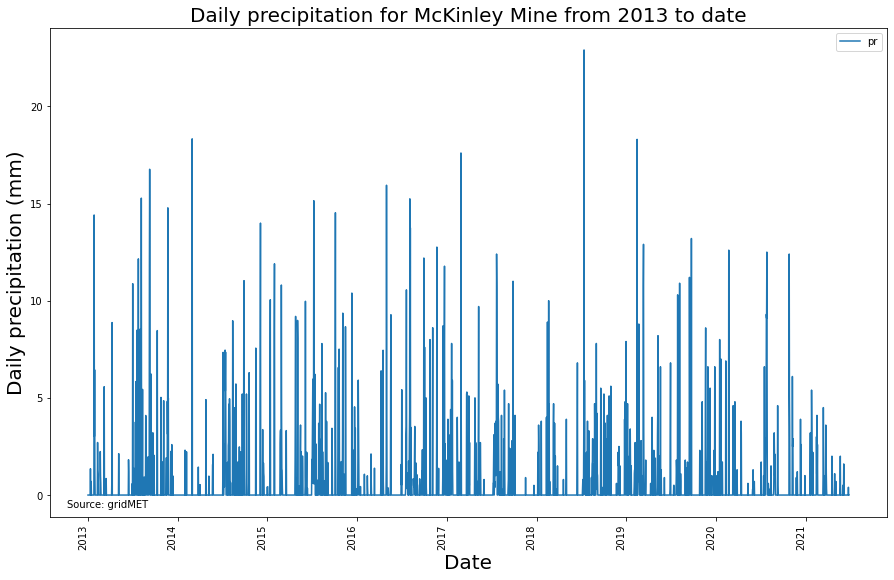

In [8]:
# Setup plot
fig, ax = plt.subplots(figsize=(15, 10))

met_data_mckinley_df.plot(y='pr', ax=ax)

ax.set_title(
    "Daily precipitation for McKinley Mine from 2013 to date", fontsize=20)

plt.xlabel("Date", fontsize=20)
plt.ylabel("Daily precipitation (mm)", fontsize=20)
ax.text(.02, .02, "Source: gridMET", transform=ax.transAxes, color="black")

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()

## Store the output

In [7]:
%store met_data_mckinley_df

Stored 'met_data_mckinley_df' (DataFrame)
